In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [5]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [3]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [4]:
df = pd.read_csv('adult.data', names=cols)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

Male      21790
Female    10771

In [7]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

Female    36.858230
Male      39.433547

In [34]:
df.groupby(['sex']).age.mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

United-States                 0.895857

In [9]:
df['native-country'].value_counts(normalize=True)

 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

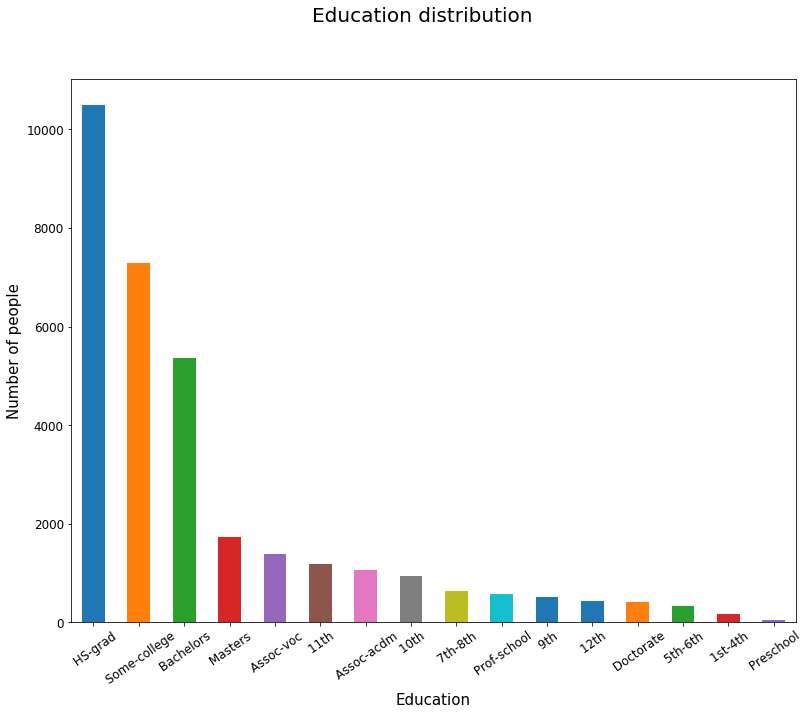

In [95]:
df.education.value_counts().plot.bar(figsize=(13,10), fontsize=12)
plt.suptitle('Education distribution', fontsize=20)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.xticks(rotation=35)

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

mean     1.858028e+05
std      1.056468e+05

In [69]:
df[df['marital-status']==' Divorced'].fnlwgt.describe()

count    4.443000e+03
mean     1.858028e+05
std      1.056468e+05
min      1.941000e+04
25%      1.155825e+05
50%      1.753700e+05
75%      2.310475e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

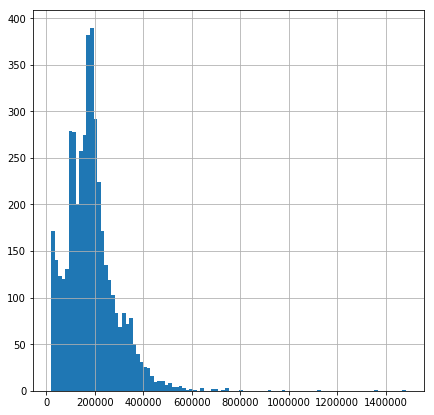

In [83]:
df[df['marital-status']==' Divorced'].fnlwgt.hist(bins=100, figsize=(7,7))

Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [136]:
high_income=df[(df['result']==' >50K')]

In [260]:
high_income[(high_income['education'] == ' Bachelors') | (high_income['education'] == ' Masters') |
            (high_income['education'] == ' Doctorate')].education.value_counts().sum()/high_income.education.value_counts().sum()

0.4445861497258003

 Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [165]:
df.groupby(['education'])['hours-per-week'].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

Ответ: мужчины.

In [166]:
df.groupby(['sex'])['hours-per-week'].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [262]:
df[(df['marital-status']==' Married-AF-spouse') | (df['marital-status']==' Married-civ-spouse')
    | (df['marital-status']==' Married-spouse-absent') | (df['marital-status']==' Separated')]['hours-per-week'].sum()

706046

In [264]:
df['hours-per-week'].sum()-706046

610638

Ответ: те, кто в отношениях, работают больше.

# Из каких стран люди работают farmers/fishers?

In [234]:
df[df['occupation']==' Farming-fishing']['native-country'].value_counts()

 United-States    879
 Mexico            77
 Puerto-Rico        5
 ?                  5
 Guatemala          4
 Philippines        4
 Italy              2
 Canada             2
 Vietnam            2
 Cuba               2
 El-Salvador        2
 Cambodia           1
 Ireland            1
 Portugal           1
 England            1
 France             1
 Hong               1
 Japan              1
 Poland             1
 Germany            1
 Yugoslavia         1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

>Сколько максимум работают люди в неделю?

Ответ: 99

In [194]:
df['hours-per-week'].max()

99

>Как много таких людей кто работает наибольшее количество часов?

Ответ: 85

In [223]:
df[df['hours-per-week']==99].count()

age               85
workclass         85
fnlwgt            85
education         85
education-num     85
marital-status    85
occupation        85
relationship      85
race              85
sex               85
capital-gain      85
capital-loss      85
hours-per-week    85
native-country    85
result            85
dtype: int64

>Какой у них доход (распечатать)?

In [228]:
df[df['hours-per-week']==99]['result'].value_counts()

 <=50K    60
 >50K     25
Name: result, dtype: int64

In [276]:
df[df['hours-per-week']==99]['result']

935        >50K
1172       >50K
1887       >50K
3578       >50K
4086      <=50K
4308      <=50K
4441       >50K
5376      <=50K
5432      <=50K
6618      <=50K
6898      <=50K
8072      <=50K
8393       >50K
8654      <=50K
8796       >50K
9811      <=50K
9831      <=50K
10143     <=50K
10266     <=50K
10468     <=50K
10986      >50K
11833     <=50K
12209     <=50K
12625     <=50K
12788     <=50K
13558      >50K
13580     <=50K
13617     <=50K
13858      >50K
14593     <=50K
          ...  
23226     <=50K
23398     <=50K
23649      >50K
23830     <=50K
24483      >50K
25354     <=50K
25713      >50K
25806     <=50K
25831      >50K
25986     <=50K
26250     <=50K
26596      >50K
26638     <=50K
26858     <=50K
27222     <=50K
27764     <=50K
27809     <=50K
28112     <=50K
29187      >50K
29751     <=50K
29989      >50K
30036      >50K
30610      >50K
30754     <=50K
30766      >50K
30992     <=50K
31681      >50K
31699     <=50K
32469     <=50K
32531     <=50K
Name: result, Length: 85